# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
from scipy.stats import iqr 
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c
from sklearn.metrics import r2_score,mean_absolute_error,confusion_matrix, classification_report  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor


# IMPORTING DATASET

In [2]:
#weather data
os.chdir("C:/Users/ashwi/Desktop/hack data")
data = pd.read_excel("6_weather_data_ (2).xlsx")
data

,Day,Std Week,Month_id,Month,Season_id,Season,Year,Dcode,Mcode,Dist_id,...,CropSeason_id,crop_season,Date,Temp_min,Temp_max,Rainfall,Humidity_min,Humidity_max,Wind_min,Wind_max
0,365.0,52.0,12.0,Dec,1.0,PM,2019,1,1,1.0,...,1.0,rabi,2019-12-31,15.80,26.70,0.0,37.20,81.60,0.0,2.1
1,365.0,52.0,12.0,Dec,1.0,PM,2019,1,2,1.0,...,1.0,rabi,2019-12-31,15.55,25.55,0.0,38.60,78.30,0.0,7.1
2,365.0,52.0,12.0,Dec,1.0,PM,2019,1,3,1.0,...,1.0,rabi,2019-12-31,17.65,25.90,0.0,40.95,79.95,0.0,1.4
3,365.0,52.0,12.0,Dec,1.0,PM,2019,1,4,1.0,...,1.0,rabi,2019-12-31,18.40,28.10,0.0,45.90,94.80,0.0,1.1
4,365.0,52.0,12.0,Dec,1.0,PM,2019,1,5,1.0,...,1.0,rabi,2019-12-31,19.00,25.80,0.0,45.70,89.10,0.1,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554186,NaN,NaN,NaN,NaN,NaN,NaN,2017,33,7,34.0,...,1.0,rabi,2017-01-01,14.50,30.70,0.0,31.10,89.40,NaN,10.3
554187,NaN,NaN,NaN,NaN,NaN,NaN,2017,33,9,34.0,...,1.0,rabi,2017-01-01,15.80,31.20,0.0,25.00,61.00,NaN,5.4
554188,NaN,NaN,NaN,NaN,NaN,NaN,2017,33,10,34.0,...,1.0,rabi,2017-01-01,19.00,30.50,0.0,30.30,79.60,NaN,NaN
554189,NaN,NaN,NaN,NaN,NaN,NaN,2017,33,12,34.0,...,1.0,rabi,2017-01-01,13.40,30.00,0.0,45.00,82.70,NaN,12.2


In [3]:
data.isnull().sum() # checking null values of weather data

Day              214984
Std Week         214985
Month_id         214985
Month            214984
Season_id        214985
Season           214985
Year                  0
Dcode                 0
Mcode                 0
Dist_id           10272
District              0
Mandal Code           0
Mandal                0
CropSeason_id    124413
crop_season      124413
Date                  0
Temp_min          11751
Temp_max          11751
Rainfall              1
Humidity_min      11923
Humidity_max      11919
Wind_min         215804
Wind_max          38461
dtype: int64

Taking necessary data as temp dataset

In [4]:
temp=data[['Season_id', 'Season', 'Year','Dist_id', 'District','CropSeason_id', 'crop_season', 'Temp_min', 'Temp_max','Rainfall', 'Humidity_min', 'Humidity_max', 'Wind_min', 'Wind_max']]
temp

,Season_id,Season,Year,Dist_id,District,CropSeason_id,crop_season,Temp_min,Temp_max,Rainfall,Humidity_min,Humidity_max,Wind_min,Wind_max
0,1.0,PM,2019,1.0,ADILABAD,1.0,rabi,15.80,26.70,0.0,37.20,81.60,0.0,2.1
1,1.0,PM,2019,1.0,ADILABAD,1.0,rabi,15.55,25.55,0.0,38.60,78.30,0.0,7.1
2,1.0,PM,2019,1.0,ADILABAD,1.0,rabi,17.65,25.90,0.0,40.95,79.95,0.0,1.4
3,1.0,PM,2019,1.0,ADILABAD,1.0,rabi,18.40,28.10,0.0,45.90,94.80,0.0,1.1
4,1.0,PM,2019,1.0,ADILABAD,1.0,rabi,19.00,25.80,0.0,45.70,89.10,0.1,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554186,NaN,NaN,2017,34.0,YADADHRI(BHONGIR),1.0,rabi,14.50,30.70,0.0,31.10,89.40,NaN,10.3
554187,NaN,NaN,2017,34.0,YADADHRI(BHONGIR),1.0,rabi,15.80,31.20,0.0,25.00,61.00,NaN,5.4
554188,NaN,NaN,2017,34.0,YADADHRI(BHONGIR),1.0,rabi,19.00,30.50,0.0,30.30,79.60,NaN,NaN
554189,NaN,NaN,2017,34.0,YADADHRI(BHONGIR),1.0,rabi,13.40,30.00,0.0,45.00,82.70,NaN,12.2


In [7]:
# importing yield data
data1=pd.read_excel('yield_data.xlsx')
print(data1)

     S.No         Crop  Dist_id       District       Year  Season  \
0       1    groundnut        1       ADILABAD  2016-2017  kharif   
1       2    groundnut       11  KOMARAM BHEEM  2016-2017  kharif   
2       4    groundnut       13     MANCHERIAL  2016-2017  kharif   
3       5    groundnut       21         NIRMAL  2016-2017  kharif   
4       6    groundnut       22      NIZAMABAD  2016-2017  kharif   
..    ...          ...      ...            ...        ...     ...   
553   555  bengal gram       30     WANAPARTHY  2018-2019    rabi   
554   556  bengal gram       18   NAGARKURNOOL  2018-2019    rabi   
555   557  bengal gram       19       NALGONDA  2018-2019    rabi   
556   558  bengal gram       28       SURYAPET  2018-2019    rabi   
557   559  bengal gram       10        KHAMMAM  2018-2019    rabi   

     Season_yield  Total  
0               0   2068  
1               0   2068  
2            1930   2066  
3               0   2068  
4            1930   2044  
..       

# CHECKING IF THERE IS COMMON DATA BETWEEN WEATHER AND YIELD DATA

# 1

In [8]:
print('columns of Yield_data:\n\n',data1.columns)

columns of Yield_data:

 Index(['S.No', 'Crop', 'Dist_id', 'District', 'Year', 'Season', 'Season_yield',
       'Total'],
      dtype='object')


In [ ]:
print('columns of Weather_data:\n\n',data.columns)

Findings-1: The common data found relates to year,districts,crop seasons

## 2

In [9]:
print('year data of weather data:',set(data.Year))

year data of weather data: {2017, 2018, 2019}


In [10]:
print('year data of yield data:',set(data1.Year))

year data of yield data: {'2016-2017', '2017-2018', '2018-2019'}


Findings-2: We'll consider only the data that was recorded in 2017,2018 from the datasets.

## 3

In [14]:
x=set(data.District)
y=set(data1.District)
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()
c=0
for i in x:
    for j in x:
        if similar(i,j)>0.91:
            print(i,',',j)
            c+=1
print('total count:',c)

JANGAON , JANGAON
MEHABOOBABAD , MEHABOOBABAD
JOGULAMBA , JOGULAMBA
NIZAMABAD , NIZAMABAD
RANGA REDDY , RANGA REDDY
MEDCHAL , MEDCHAL
VIKARABAD , VIKARABAD
KOMARAM BHEEM ASIFABAD , KOMARAM BHEEM ASIFABAD
WARANGAL(R) , WARANGAL(R)
MEDAK , MEDAK
HYDERABAD , HYDERABAD
BHADRADRI KOTHAGUDEM , BHADRADRI KOTHAGUDEM
MAHABOOBNAGAR , MAHABOOBNAGAR
SURYAPET , SURYAPET
KHAMMAM , KHAMMAM
KARIMNAGAR , KARIMNAGAR
NIRMAL , NIRMAL
NAGARKURNOOL , NAGARKURNOOL
MANCHERIAL , MANCHERIAL
JAGTIAL , JAGTIAL
PEDDAPALLY , PEDDAPALLY
JAYASHANKAR BHUPALPALLY , JAYASHANKAR BHUPALPALLY
WARANGAL(U) , WARANGAL(U)
WANAPARTHY , WANAPARTHY
SIDDIPET , SIDDIPET
SANGAREDDY , SANGAREDDY
YADADHRI(BHONGIR) , YADADHRI(BHONGIR)
NARAYANPET , NARAYANPET
NALGONDA , NALGONDA
RAJANNA SIRCILLA , RAJANNA SIRCILLA
ADILABAD , ADILABAD
MULUGU , MULUGU
KAMAREDDY , KAMAREDDY
total count: 33


# WEATHER DATA MOD

 Modifying the weather_data to make it usable with yield_data

In [13]:
set(data.Year)

{2017, 2018, 2019}

In [17]:
d17 = data[data.Year==2017]
d18 = data[data.Year==2018]    #Taking weather data based on years
d19 = data[data.Year==2019]

In [18]:
print(d17.shape)
print(d18.shape)           #checking the shape of data
print(d19.shape)

(214985, 23)
(213160, 23)
(126046, 23)


In [19]:
print(set(d17.crop_season))
print(set(d18.crop_season))      #printing unique crop seasons
print(set(d19.crop_season))

{nan, 'kharif', 'rabi'}
{nan, 'kharif', 'rabi'}
{nan, 'kharif', 'rabi'}


In [20]:
districts=set(temp.District)     #making a set:{districts} contains all district names
districts

{'ADILABAD',
 'BHADRADRI KOTHAGUDEM',
 'HYDERABAD',
 'JAGTIAL',
 'JANGAON',
 'JAYASHANKAR BHUPALPALLY',
 'JOGULAMBA',
 'KAMAREDDY',
 'KARIMNAGAR',
 'KHAMMAM',
 'KOMARAM BHEEM ASIFABAD',
 'MAHABOOBNAGAR',
 'MANCHERIAL',
 'MEDAK',
 'MEDCHAL',
 'MEHABOOBABAD',
 'MULUGU',
 'NAGARKURNOOL',
 'NALGONDA',
 'NARAYANPET',
 'NIRMAL',
 'NIZAMABAD',
 'PEDDAPALLY',
 'RAJANNA SIRCILLA',
 'RANGA REDDY',
 'SANGAREDDY',
 'SIDDIPET',
 'SURYAPET',
 'VIKARABAD',
 'WANAPARTHY',
 'WARANGAL(R)',
 'WARANGAL(U)',
 'YADADHRI(BHONGIR)'}

In [21]:
#function to calculate average of data passed
#calculating average rainfall,temparatures,humidity for the passed data
# return dataset containing average rainfall,temparatures,humidity for the passed data

def sub_data_avg_by_year(data):
    new_df={
    'District':[],
    'Rainfall':[],
    'crop_season':[]
    }
    temp1=data
    for i in districts:
        for j in ['rabi','kharif']:
            new_df['District'].append(i)
            new_df['Rainfall'].append(temp1[(temp1.crop_season==j) & (temp1.District==i)].Rainfall.dropna().mean())
            new_df['crop_season'].append(j)

    new_df=pd.DataFrame(new_df)
    print("dataset created !!!!!")
    print("null values report:")
    print(new_df.isnull().sum())
    return new_df

In [22]:
#2017 avg
#calculating average rainfall,temparatures,humidity for the year 2017
#new_df: dataset with average rainfall for all districts and crop seasons during 2017

new_df=sub_data_avg_by_year(d17)

dataset created !!!!!
null values report:
District       0
Rainfall       0
crop_season    0
dtype: int64


In [23]:
#2018 avg
#calculating average rainfall,temparatures,humidity for the year 2018
#new_df: dataset with average rainfall for all districts and crop seasons during 2018

new_df1=sub_data_avg_by_year(d18)

dataset created !!!!!
null values report:
District       0
Rainfall       4
crop_season    0
dtype: int64


In [25]:
#2019 avg
#calculating average rainfall,temparatures,humidity for the year 2019
#new_df: dataset with average rainfall for all districts and crop seasons during 2019
new_df2=sub_data_avg_by_year(d19)

dataset created !!!!!
null values report:
District       0
Rainfall       0
crop_season    0
dtype: int64


In [18]:
#2017 avg
#calculating average rainfall for the year 2017
#new_df: dataset with average rainfall for all districts and crop seasons during 2017

new_df={
    'District':[],
    'Rainfall':[],
    'crop_season':[]
}
temp1=d17
print(new_df)
for i in districts:
    for j in ['rabi','kharif']:
        new_df['District'].append(i)
        new_df['Rainfall'].append(temp1[(temp1.crop_season==j) & (temp1.District==i)].Rainfall.mean())
        new_df['crop_season'].append(j)
new_df=pd.DataFrame(new_df)

{'District': [], 'Rainfall': [], 'crop_season': []}


In [19]:
#2018 avg
#calculating average rainfall for the year 2018
#new_df1: dataset with average rainfall for all districts and crop seasons during 2018

new_df1={
    'District':[],
    'Rainfall':[],
    'crop_season':[]
}
temp1=d18

for i in districts:
    for j in ['rabi','kharif']:
        new_df1['District'].append(i)
        new_df1['Rainfall'].append(temp1[(temp1.crop_season==j) & (temp1.District==i)].Rainfall.mean())
        new_df1['crop_season'].append(j)
new_df1=pd.DataFrame(new_df1)

In [20]:
#2019 avg
#calculating average rainfall for the year 2019
#new_df2: dataset with average rainfall for all districts and crop seasons during 2019

new_df2={
    'District':[],
    'Rainfall':[],
    'crop_season':[]
}
temp1=d19

for i in districts:
    for j in ['rabi','kharif']:
        new_df2['District'].append(i)
        new_df2['Rainfall'].append(temp1[(temp1.crop_season==j) & (temp1.District==i)].Rainfall.mean())
        new_df2['crop_season'].append(j)
new_df2=pd.DataFrame(new_df2)

In [21]:
new_df   #2017 rainfall data

,District,Rainfall,crop_season
0,WARANGAL(R),0.008816,rabi
1,WARANGAL(R),5.400661,kharif
2,NIRMAL,0.036319,rabi
3,NIRMAL,4.560120,kharif
4,NIZAMABAD,0.015597,rabi
...,...,...,...
61,NALGONDA,3.884684,kharif
62,MEDAK,0.060033,rabi
63,MEDAK,4.895528,kharif
64,KHAMMAM,0.007821,rabi


In [22]:
new_df1   #2018 rainfall data

,District,Rainfall,crop_season
0,WARANGAL(R),0.207152,rabi
1,WARANGAL(R),4.440434,kharif
2,NIRMAL,0.354165,rabi
3,NIRMAL,5.405819,kharif
4,NIZAMABAD,0.174761,rabi
...,...,...,...
61,NALGONDA,2.197220,kharif
62,MEDAK,0.072086,rabi
63,MEDAK,2.977033,kharif
64,KHAMMAM,0.511447,rabi


In [23]:
new_df2   #2019 rainfall data

,District,Rainfall,crop_season
0,WARANGAL(R),0.384734,rabi
1,WARANGAL(R),8.364990,kharif
2,NIRMAL,0.070923,rabi
3,NIRMAL,7.124647,kharif
4,NIZAMABAD,0.253024,rabi
...,...,...,...
61,NALGONDA,4.427826,kharif
62,MEDAK,0.067623,rabi
63,MEDAK,6.653821,kharif
64,KHAMMAM,0.220375,rabi


In [26]:
data2=data1[(data1.Year=='2017-2018') | (data1.Year=='2018-2019')]           #data2 : yield data from 2017-2019
data2

,S.No,Crop,Dist_id,District,Year,Season,Season_yield,Total
186,188,groundnut,1,ADILABAD,2017-2018,kharif,0,2236
187,189,groundnut,11,KOMARAM BHEEM,2017-2018,kharif,0,0
188,190,groundnut,13,MANCHERIAL,2017-2018,kharif,2188,2237
189,191,groundnut,21,NIRMAL,2017-2018,kharif,0,2236
190,192,groundnut,22,NIZAMABAD,2017-2018,kharif,2188,2226
...,...,...,...,...,...,...,...,...
553,555,bengal gram,30,WANAPARTHY,2018-2019,rabi,2140,2140
554,556,bengal gram,18,NAGARKURNOOL,2018-2019,rabi,1569,1569
555,557,bengal gram,19,NALGONDA,2018-2019,rabi,1569,1569
556,558,bengal gram,28,SURYAPET,2018-2019,rabi,1569,1569


MERGING RAINFALL DATA WITH YIELD DATA

In [27]:
l=[]
for i in range (len(data2)):
    year=data2.iloc[i,4]
    dist=data2.iloc[i,3]
    season=data2.iloc[i,5]
    if year=='2017-2018':
        l.append(new_df[(new_df.District==dist)&(new_df.crop_season==season)]['Rainfall']) 
    else:
        l.append(new_df1[(new_df1.District==dist)&(new_df1.crop_season==season)]['Rainfall'])
for i in range(len(l)):
    try:
        l[i]=l[i].values[0]
    except:
        l[i]=2.15798491964917    #mean value of non-NaN values of rainfall
l
data2['Rainfall']=l
data2

<ipython-input-27-b617388f073b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Rainfall']=l


,S.No,Crop,Dist_id,District,Year,Season,Season_yield,Total,Rainfall
186,188,groundnut,1,ADILABAD,2017-2018,kharif,0,2236,4.855736
187,189,groundnut,11,KOMARAM BHEEM,2017-2018,kharif,0,0,2.157985
188,190,groundnut,13,MANCHERIAL,2017-2018,kharif,2188,2237,4.958356
189,191,groundnut,21,NIRMAL,2017-2018,kharif,0,2236,4.560120
190,192,groundnut,22,NIZAMABAD,2017-2018,kharif,2188,2226,4.894814
...,...,...,...,...,...,...,...,...,...
553,555,bengal gram,30,WANAPARTHY,2018-2019,rabi,2140,2140,0.024882
554,556,bengal gram,18,NAGARKURNOOL,2018-2019,rabi,1569,1569,0.079404
555,557,bengal gram,19,NALGONDA,2018-2019,rabi,1569,1569,0.095920
556,558,bengal gram,28,SURYAPET,2018-2019,rabi,1569,1569,0.162741


In [28]:
data2.isnull().sum() #checking null values to see if data merge is succesful

S.No            0
Crop            0
Dist_id         0
District        0
Year            0
Season          0
Season_yield    0
Total           0
Rainfall        0
dtype: int64

# SAVING DATASET

In [29]:
data2.to_csv('Modified_yield_data.csv')

# STATISTICAL ANALYSIS

C:\Users\ashwi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


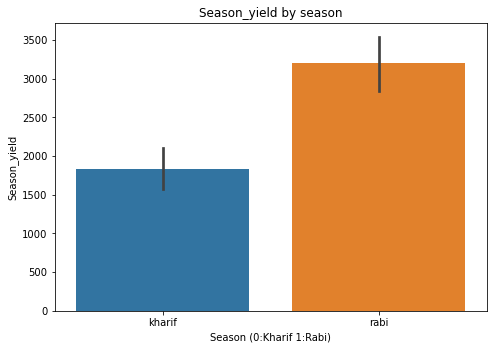

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sns.barplot(data2.Season,data2.Season_yield)
plt.gca().set(title='Season_yield by season', xlabel='Season (0:Kharif 1:Rabi)', ylabel='Season_yield')
plt.show()

C:\Users\ashwi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


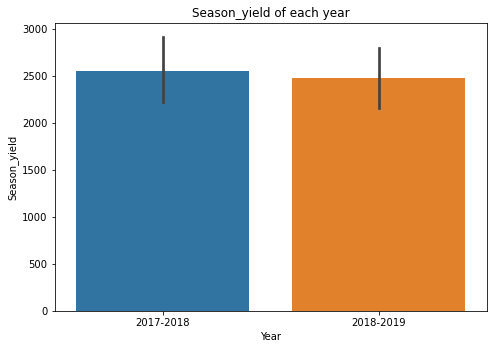

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sns.barplot(data2.Year,data2.Season_yield)
plt.gca().set(title='Season_yield of each year', xlabel='Year', ylabel='Season_yield')
plt.show()

YEAR WISE MAXIMUM YIELD BASED ON TOTAL YIELD

In [31]:
d={}
for year in set(data1.Year):
    d[year]=data1[data1.Year==year].Total.sum()
d=sorted(d.items(), key=lambda x:x[1], reverse=True)
i=0
for key,value in d:
    i+=1
    print("{}) {}: ".format(i,key),value)

1) 2017-2018:  514320
2) 2018-2019:  493902
3) 2016-2017:  450870


SEASON WISE MAXIMUM YIELD BASED ON SEASON YIELD

In [32]:
d={}
for season in set(data1.Season):
    d[season]=data1[data1.Season==season].Season_yield.sum()
d=sorted(d.items(), key=lambda x:x[1], reverse=True)
i=0
for key,value in d:
    i+=1
    print("{}) {}: ".format(i,key),value)

1) rabi:  890551
2) kharif:  487696


CROP WISE MAXIMUM YIELD BASED ON TOTAL YIELD

In [33]:
for crop in set(data1.Crop):
    maxValueIndex = data1[data1.Crop==crop].iloc[:,-1].idxmax()
    print(data1.loc[maxValueIndex],'\n'*2)

S.No                    515
Crop            bengal gram
Dist_id                  27
District           SIDDIPET
Year              2018-2019
Season               kharif
Season_yield              0
Total                  2257
Name: 513, dtype: object 


S.No                  250
Crop                maize
Dist_id                 1
District         ADILABAD
Year            2017-2018
Season             kharif
Season_yield         3450
Total                9282
Name: 248, dtype: object 


S.No                       198
Crop                 groundnut
Dist_id                     31
District        WARANGAL RURAL
Year                 2017-2018
Season                  kharif
Season_yield              4016
Total                     3281
Name: 196, dtype: object 




SEASON WISE MAXIMUM YIELD BASED ON SEASONAL YIELD

In [34]:
for season in set(data1.Season):
    print(season,"**************")
    maxValueIndex = data1[data1.Season==season].iloc[:,-2].idxmax()
    print(data1.loc[maxValueIndex])
    print()

kharif **************
S.No                    257
Crop                  maize
Dist_id                   6
District        JAYASHANKAR
Year              2017-2018
Season               kharif
Season_yield           7004
Total                  9023
Name: 255, dtype: object

rabi **************
S.No                  281
Crop                maize
Dist_id                 1
District         ADILABAD
Year            2017-2018
Season               rabi
Season_yield        10982
Total                9282
Name: 279, dtype: object



TOTAL YIELD OF EACH DISTRICT OF TELANGANA

In [35]:
d={}
for district in set(data1.District):
    d[district]=data1[data1.District==district].Total.sum()
d=sorted(d.items(), key=lambda x:x[1], reverse=True)
i=0
for key,value in d:
    i+=1
    print("{}) {}: ".format(i,key),value)

1) WARANGAL RURAL:  72760
2) PEDDAPALLI:  66038
3) NIRMAL:  64954
4) JAYASHANKAR:  63546
5) ADILABAD:  63456
6) WARANGAL URBAN:  59720
7) KARIMNAGAR:  59296
8) NIZAMABAD:  56872
9) KHAMMAM:  56430
10) KAMAREDDY:  55124
11) SURYAPET:  54692
12) MANCHERIAL:  51010
13) RAJANNA:  49740
14) JANGAON:  49394
15) JAGTIAL:  49286
16) BHADRADRI:  48848
17) KOMARAM BHEEM:  47974
18) MAHABUBABAD:  44490
19) NALGONDA:  43624
20) VIKARABAD:  41300
21) WANAPARTHY:  40868
22) MEDAK:  40500
23) SANGAREDDY:  40474
24) SIDDIPET:  39838
25) JOGULAMBA:  38492
26) YADADRI:  36000
27) RANGAREDDY:  35904
28) NAGARKURNOOL:  30470
29) MAHABUBNAGAR:  29236
30) MEDCHAL MALKAJG:  28756
31) HYDERABAD:  0


In [36]:
data2.columns

Index(['S.No', 'Crop', 'Dist_id', 'District', 'Year', 'Season', 'Season_yield',
       'Total', 'Rainfall'],
      dtype='object')

C:\Users\ashwi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


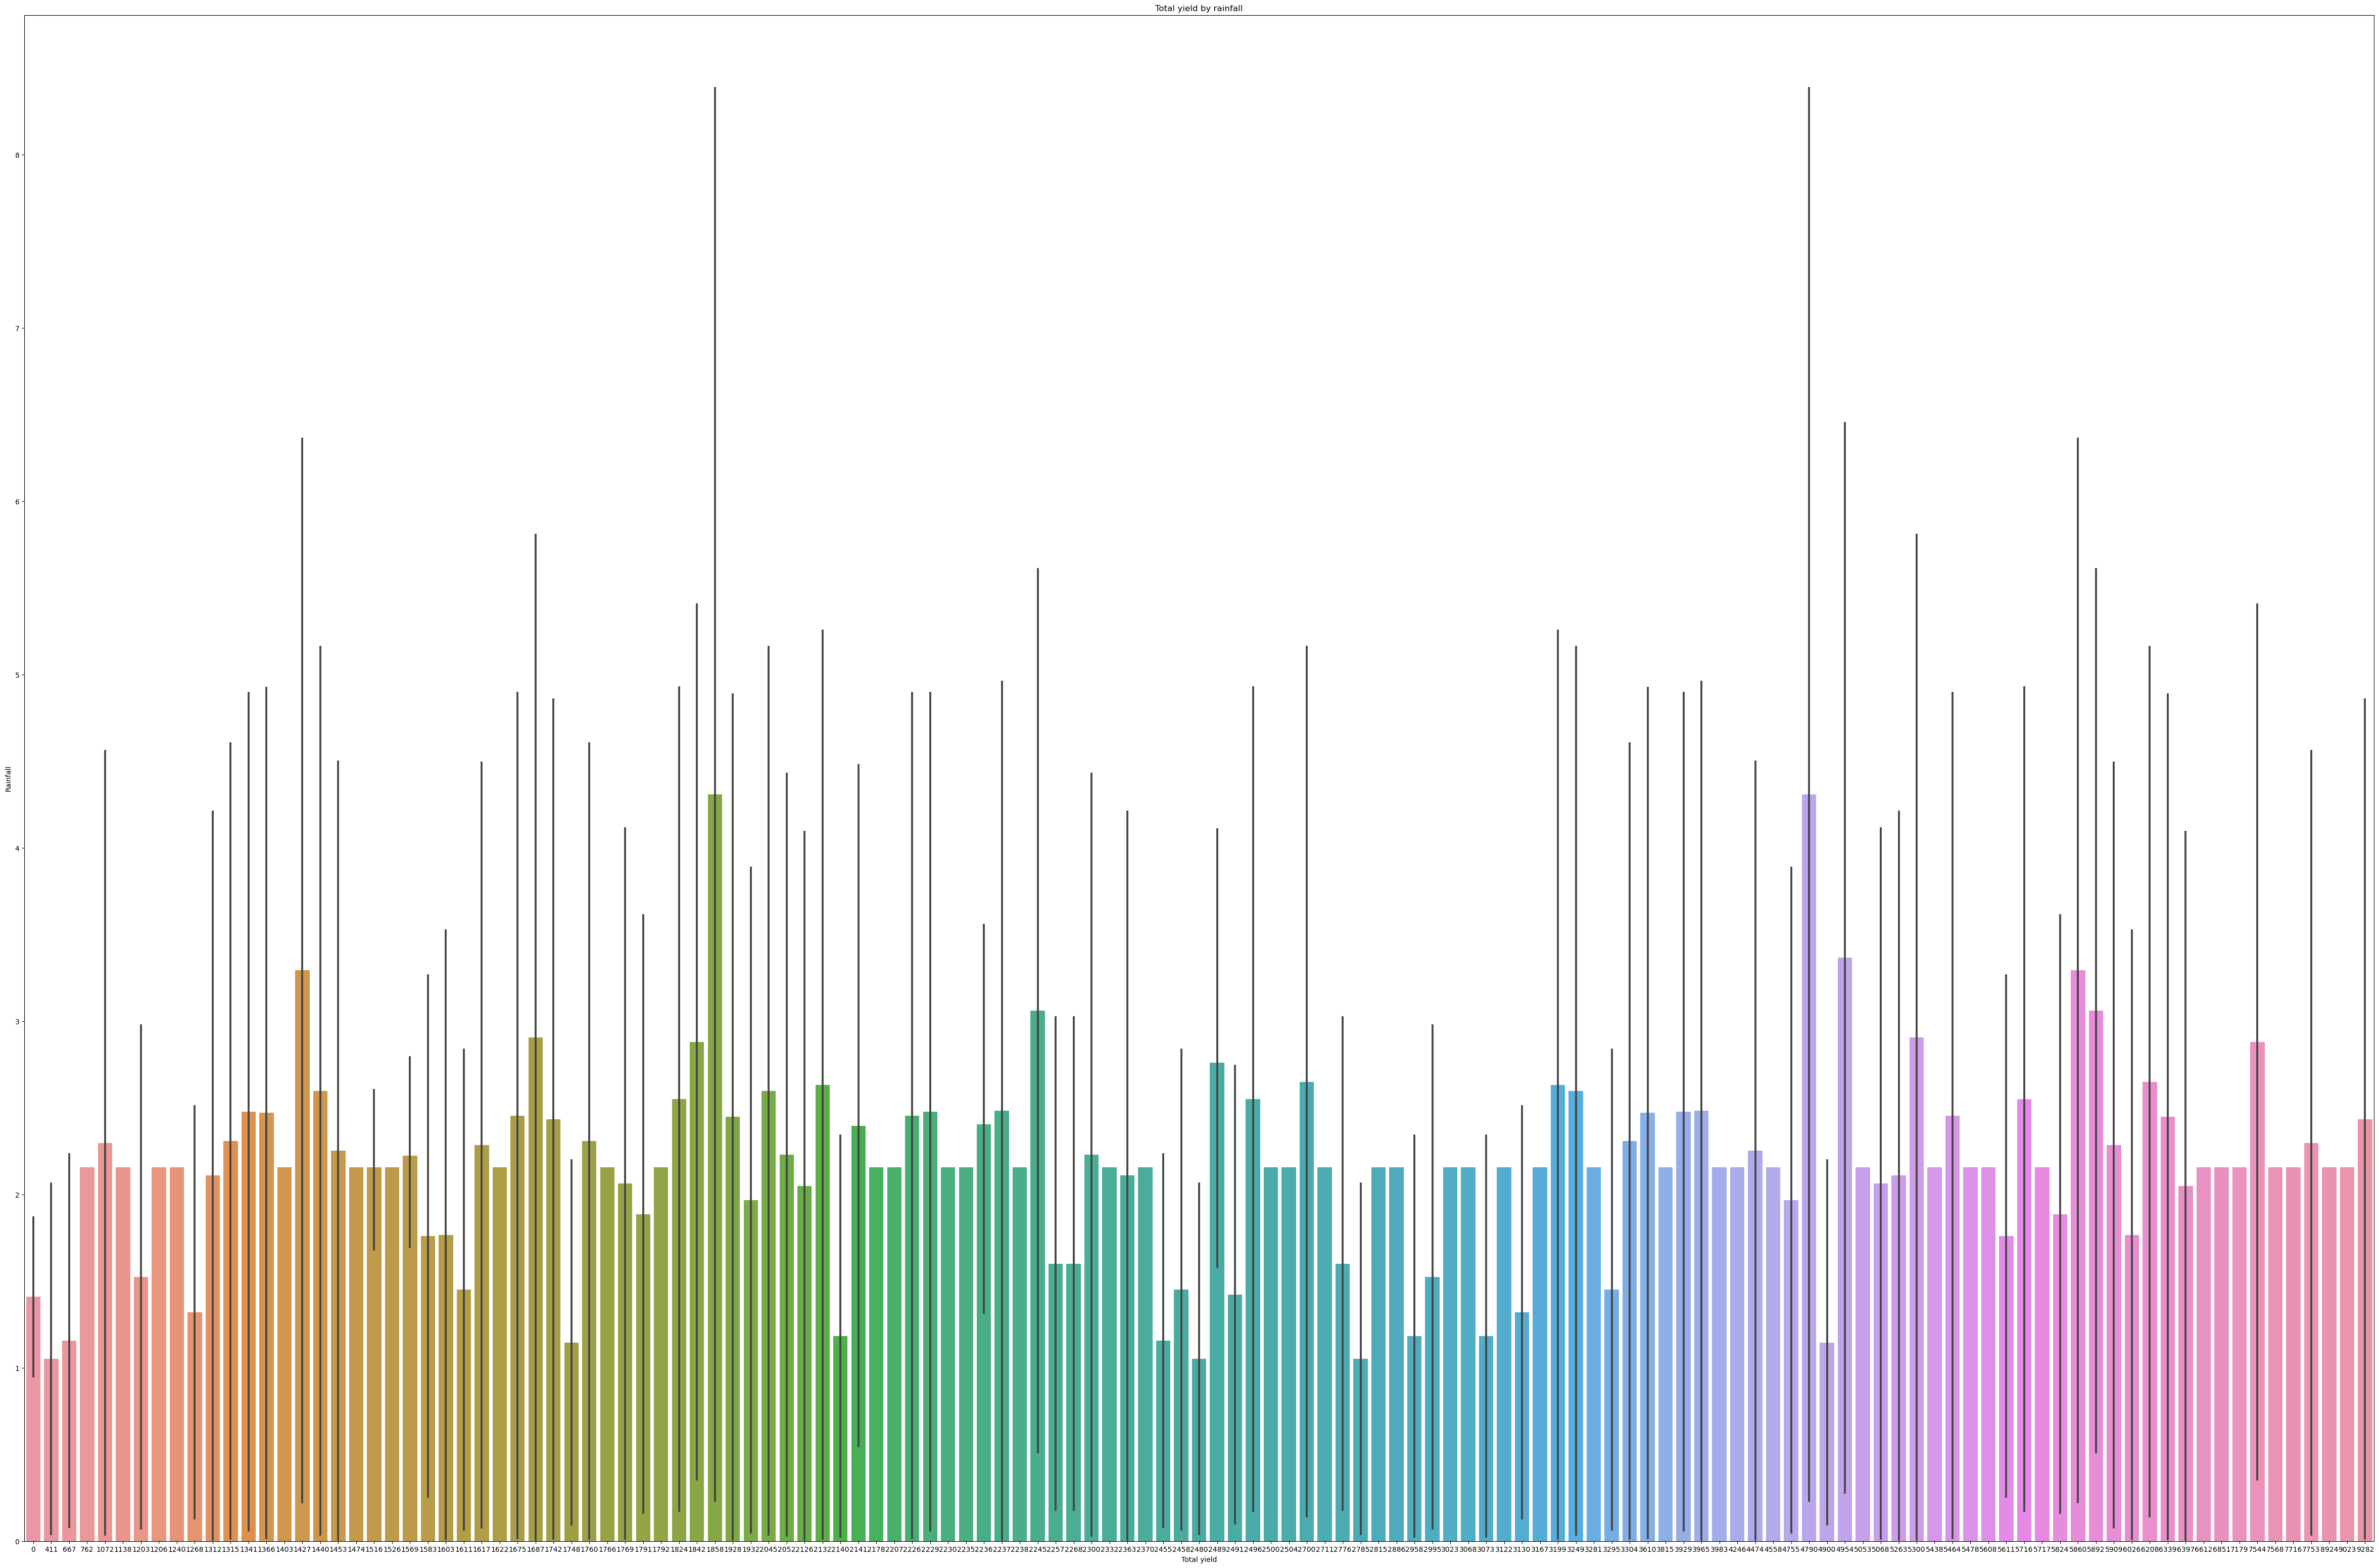

In [37]:
plt.figure(figsize=(60,40), dpi=100)
sns.barplot(data2.Total,data2.Rainfall)
plt.gca().set(title='Total yield by rainfall', xlabel='Total yield', ylabel='Rainfall')
plt.show()

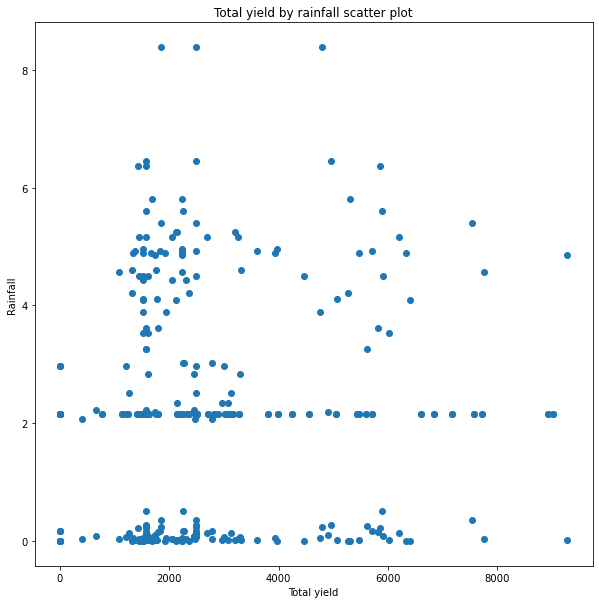

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(data2.Total,data2.Rainfall)
plt.gca().set(title='Total yield by rainfall scatter plot', xlabel='Total yield', ylabel='Rainfall')
plt.show()

# DETECTING OUTLIERS

In [39]:
from scipy.stats import iqr        #calculate inter quartile range
iqr(data2['Total'], axis=0)

1651.0

In [40]:
Q1 = np.quantile(data2.Total,0.25)     #calculate  first quadrant value
Q3 = np.quantile(data2.Total,0.75)     #calculate  third quadrant value
IQR = Q3 - Q1
print('Q1:{} IQR:{} Q3:{}'.format(Q1,IQR,Q3))

Q1:1516.0 IQR:1651.0 Q3:3167.0


REMOVING VALUES(OUTLIERS) THAT ARE NOT IN RANGE (Q1-1.5*IQR , Q3+1.5*IQR)

In [41]:
temp_df=data2
l1= Q1-1.5*IQR
l2= Q3+1.5*IQR
for i in range (len(temp_df)):
    if temp_df.iloc[i,-2]>l2 or temp_df.iloc[i,-2]<l1:
        try:
            del temp_df.iloc[i,:]
        except:
            pass
temp_df

,S.No,Crop,Dist_id,District,Year,Season,Season_yield,Total,Rainfall
186,188,groundnut,1,ADILABAD,2017-2018,kharif,0,2236,4.855736
187,189,groundnut,11,KOMARAM BHEEM,2017-2018,kharif,0,0,2.157985
188,190,groundnut,13,MANCHERIAL,2017-2018,kharif,2188,2237,4.958356
189,191,groundnut,21,NIRMAL,2017-2018,kharif,0,2236,4.560120
190,192,groundnut,22,NIZAMABAD,2017-2018,kharif,2188,2226,4.894814
...,...,...,...,...,...,...,...,...,...
553,555,bengal gram,30,WANAPARTHY,2018-2019,rabi,2140,2140,0.024882
554,556,bengal gram,18,NAGARKURNOOL,2018-2019,rabi,1569,1569,0.079404
555,557,bengal gram,19,NALGONDA,2018-2019,rabi,1569,1569,0.095920
556,558,bengal gram,28,SURYAPET,2018-2019,rabi,1569,1569,0.162741


CHECKING OUTLIERS FOR RAINFALL

In [42]:
iqr(temp_df['Rainfall'], axis=0)

2.6967815343509414

In [43]:
Q1 = np.quantile(temp_df.Rainfall,0.25)
Q3 = np.quantile(temp_df.Rainfall,0.75)
IQR = Q3 - Q1
print('Q1:{} IQR:{} Q3:{}'.format(Q1,IQR,Q3))

Q1:0.17345474613686535 IQR:2.6967815343509414 Q3:2.8702362804878065


In [44]:
l1= Q1-1.5*IQR
l2= Q3+1.5*IQR
for i in range (len(temp_df)):
    if temp_df.iloc[i,-1]>l2 or temp_df.iloc[i,-1]<l1:
        try:
            del temp_df.iloc[i,:]
        except:
            pass
temp_df

,S.No,Crop,Dist_id,District,Year,Season,Season_yield,Total,Rainfall
186,188,groundnut,1,ADILABAD,2017-2018,kharif,0,2236,4.855736
187,189,groundnut,11,KOMARAM BHEEM,2017-2018,kharif,0,0,2.157985
188,190,groundnut,13,MANCHERIAL,2017-2018,kharif,2188,2237,4.958356
189,191,groundnut,21,NIRMAL,2017-2018,kharif,0,2236,4.560120
190,192,groundnut,22,NIZAMABAD,2017-2018,kharif,2188,2226,4.894814
...,...,...,...,...,...,...,...,...,...
553,555,bengal gram,30,WANAPARTHY,2018-2019,rabi,2140,2140,0.024882
554,556,bengal gram,18,NAGARKURNOOL,2018-2019,rabi,1569,1569,0.079404
555,557,bengal gram,19,NALGONDA,2018-2019,rabi,1569,1569,0.095920
556,558,bengal gram,28,SURYAPET,2018-2019,rabi,1569,1569,0.162741


# MODEL BUILDUING

In [64]:
le=LabelEncoder()

In [46]:
le=LabelEncoder()
tempp=data2
tempp['Crop']=le.fit_transform(tempp['Crop'])                 #label encoding crop,season columns
tempp['Season']=le.fit_transform(tempp['Season'])

<ipython-input-46-8e47ce41cb89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempp['Crop']=le.fit_transform(tempp['Crop'])                           #label encoding crop,season columns
<ipython-input-46-8e47ce41cb89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempp['Season']=le.fit_transform(tempp['Season'])


In [47]:
x=tempp[['Dist_id', 'Season','Crop','Rainfall']].values                #defining independent, dependent variables
y=tempp['Season_yield'].values 

In [48]:
from sklearn.model_selection import train_test_split                                    #splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [49]:
# Fitting Random Forest Regression to the dataset
# import the regressor


# create regressor object

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# fit the regressor with x and y data

regressor.fit(x_train, y_train)



RandomForestRegressor(random_state=0)

# MODEL EVALUATION

In [51]:
reg_pred = regressor.predict(x_test)   #predicting values

In [65]:
print('model accuracy:',regressor.score(x_test, y_test))
print('mean_absolute_error: ',mean_absolute_error(y_test, reg_pred))
print("r2_score: ",r2_score(y_test,reg_pred))

model accuracy: 0.8503142323685219
mean_absolute_error:  646.9422704761904
r2_score:  0.8503142323685219


In [54]:
l=[i[3] for i in x_test] #rainfall data of x_test

C:\Users\ashwi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ashwi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


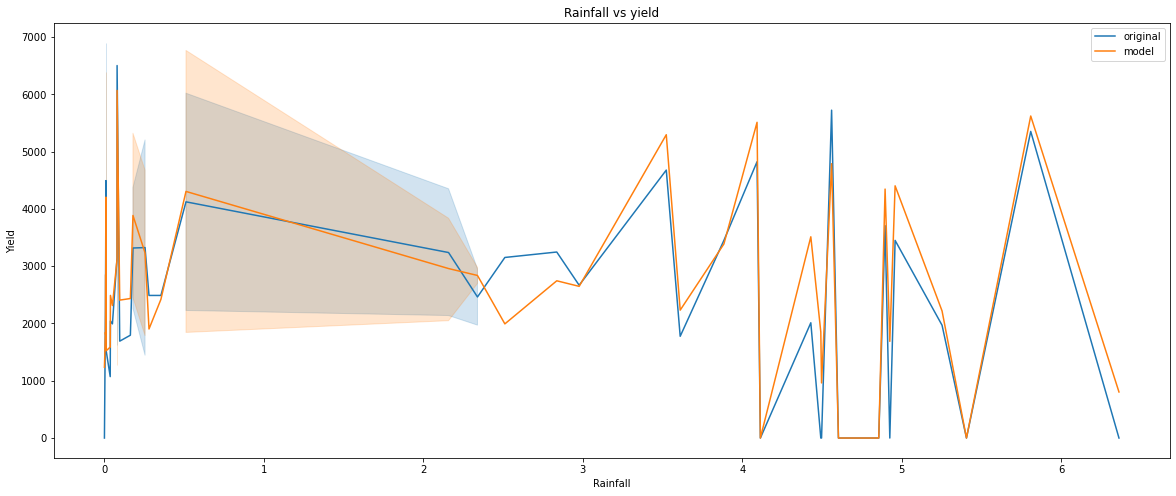

In [62]:
plt.figure(figsize=(20,8))
sns.lineplot(l,y_test)
sns.lineplot(l,reg_pred)
plt.gca().set(title='Rainfall vs yield', xlabel='Rainfall', ylabel='Yield')
plt.legend(labels=["original","model"])
plt.show()